In [5]:
def distribute_uniformly(total_demand, N):
    demand_per_item = total_demand / N
    uniform_distribution = {i: demand_per_item for i in range(N)}
    return uniform_distribution

def distribute_lowly_concentrated(total_demand, N, k):
    demand_per_item = []
    total_powers = sum([i ** -k for i in range(1, N + 1)])
    for i in range(1, N + 1):
        demand = (total_demand / total_powers) * (i ** -k)
        demand_per_item.append(demand)
    lowly_concentrated_distribution = {i: demand for i, demand in enumerate(demand_per_item)}
    return lowly_concentrated_distribution

def distribute_highly_concentrated(total_demand, N, alpha):
    demand_per_item = []
    C = total_demand * (alpha - 1) / (alpha ** alpha)
    for i in range(1, N + 1):
        demand = C / (i ** alpha)
        demand_per_item.append(demand)

    # Normalize demands to match the total demand
    total_calculated_demand = sum(demand_per_item)
    normalization_factor = total_demand / total_calculated_demand
    normalized_demand_per_item = [demand * normalization_factor for demand in demand_per_item]
    
    highly_concentrated_distribution = {i: demand for i, demand in enumerate(normalized_demand_per_item)}
    return highly_concentrated_distribution

# Example usage
total_demand = 25000/250
N = 10
k_low = 0.5
alpha_high = 1.5

uniform_distribution = distribute_uniformly(total_demand, N)
lowly_concentrated_distribution = distribute_lowly_concentrated(total_demand, N, k_low)
highly_concentrated_distribution = distribute_highly_concentrated(total_demand, N, alpha_high)

print("Uniform Distribution:", uniform_distribution)
print("Lowly Concentrated Distribution:", lowly_concentrated_distribution)
print("Highly Concentrated Distribution:", highly_concentrated_distribution)


Uniform Distribution: {0: 10.0, 1: 10.0, 2: 10.0, 3: 10.0, 4: 10.0, 5: 10.0, 6: 10.0, 7: 10.0, 8: 10.0, 9: 10.0}
Lowly Concentrated Distribution: {0: 19.916359657128616, 1: 14.082992970105828, 2: 11.498715609320609, 3: 9.958179828564308, 4: 8.906866811534798, 5: 8.130819782286206, 6: 7.527676382068852, 7: 7.041496485052914, 8: 6.638786552376205, 9: 6.298105921561659}
Highly Concentrated Distribution: {0: 50.11686015541615, 1: 17.718985833836324, 2: 9.644994233889449, 3: 6.2646075194270185, 4: 4.482588245054447, 5: 3.410020413644189, 6: 2.706056091074143, 7: 2.2148732292295406, 8: 1.8561800057561537, 9: 1.5848342726725526}


100.0

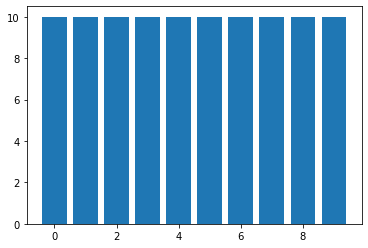

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(uniform_distribution)), uniform_distribution.values()) 
np.sum(list(uniform_distribution.values()))

99.99999999999999

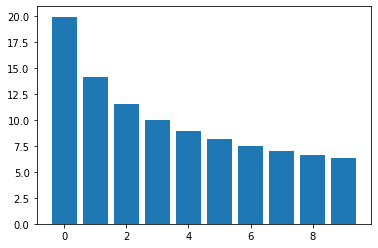

In [7]:

plt.bar(np.arange(len(lowly_concentrated_distribution)), lowly_concentrated_distribution.values()) 
np.sum(list(lowly_concentrated_distribution.values()))


99.99999999999997

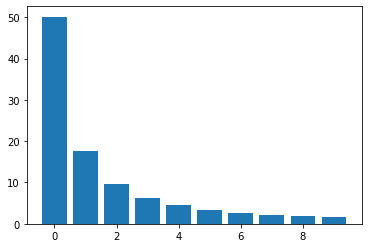

In [8]:

plt.bar(np.arange(len(highly_concentrated_distribution)), highly_concentrated_distribution.values()) 
np.sum(list(highly_concentrated_distribution.values()))

Geometric Distribution: {0: 12.46065359345489, 1: 11.837620913782144, 2: 11.245739868093036, 3: 10.683452874688385, 4: 10.149280230953966, 5: 9.641816219406266, 6: 9.159725408435952, 7: 8.701739138014155, 8: 8.266652181113445, 9: 7.853319572057773}


100.0

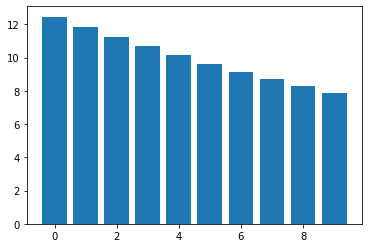

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def distribute_geometric(total_demand, N, p):
    demand_per_item = []
    if p != 0:
        geometric_sum = sum([p * (1 - p) ** (i - 1) for i in range(1, N + 1)])
        for i in range(1, N + 1):
            demand = (total_demand / geometric_sum) * (p * (1 - p) ** (i - 1))
            demand_per_item.append(demand)
        geometric_distribution = {i: demand for i, demand in enumerate(demand_per_item)}
    
    else:
        demand_per_item = total_demand / N
        geometric_distribution = {i: demand_per_item for i in range(N)}
        
    return geometric_distribution

# Example usage
total_demand = 25000 / 250
N = 10
p = 0.05


geometric_distribution = distribute_geometric(total_demand, N, p)
print("Geometric Distribution:", geometric_distribution)


plt.bar(np.arange(len(geometric_distribution)), geometric_distribution.values()) 
np.sum(list(geometric_distribution.values()))